In [47]:
location_mapping = {'US-OH-Columbus': 'Columbus',
 'US-NY-New York': 'New York',
 'US-CA-Remote (San Francisco)': 'Remote',
 'AU-Sydney': 'Sydney',
 'ZA-Cape Town': 'Cape Town',
 'US-TN-Remote (Santa Barbara)': 'Remote',
 'US-NY (Remote) UK': 'Remote',
 'US-WA-Seattle': 'Seattle',
 'EU-Poland': 'Remote',
 'US-CA-San Francisco': 'Remote',
 'US-NC-Remote (New York)': 'Remote',
 'US-CA-Remote (Santa Barbara)': 'Remote',
 'SG-Singapore': 'Singapore',
 'US-TX-Remote (Seattle)': 'Remote',
 '0. Advisor - US': 'Remote',
 'US-OH-Remote (Columbus)': 'Remote',
 'US-AZ-Remote (New York)': 'Remote',
 'US-AR-Remote (Columbus)': 'Remote',
 'NO-Oslo': 'Remote',
 'US-CO-Remote (New York)': 'Remote',
 'US-CA-Remote (Seattle)': 'Remote',
 'CN-Shanghai': 'Shanghai',
 'US-AZ-Remote (Seattle)': 'Remote',
 'US-CT-Remote (New York)': 'Remote',
 '0.Contractor': 'Remote',
 'GB-London': 'London',
 'US-CA-Santa Barbara': 'Santa Barbara',
 'Nepal (US-WA-Seattle': 'Seattle',
 'US-HI-Remote (Santa Barbara)': 'Remote',
#  'New York': 'New York',        
#  'Cape Town': 'Cape Town',                            
#  'Santa Barbara': 'Santa Barbara',     
#  'Remote': 'Remote',                         
 }

department_nodes = {'Product Management': [],
 'Sales': [],
 'None': [],
 'G&A': [],
 'Finance': [],
 'Support and Operations': [],
 'Marketing': [],
 'Technology': [],
 'People': []}

department_edges = {'Product Management': [],
 'Sales': [],
 'None': [],
 'G&A': [],
 'Finance': [],
 'Support and Operations': [],
 'Marketing': [],
 'Technology': [],
 'People': []}

location_nodes = {'Singapore': [],
 'Columbus': [],
 'Seattle': [],
 'Shanghai': [],
 'New York': [],
 'London': [],
 'Santa Barbara': [],
 'Cape Town': [],
 'Remote': [],
 'Sydney': []}

location_edges = {'Singapore': [],
 'Columbus': [],
 'Seattle': [],
 'Shanghai': [],
 'New York': [],
 'London': [],
 'Santa Barbara': [],
 'Cape Town': [],
 'Remote': [],
 'Sydney': []}



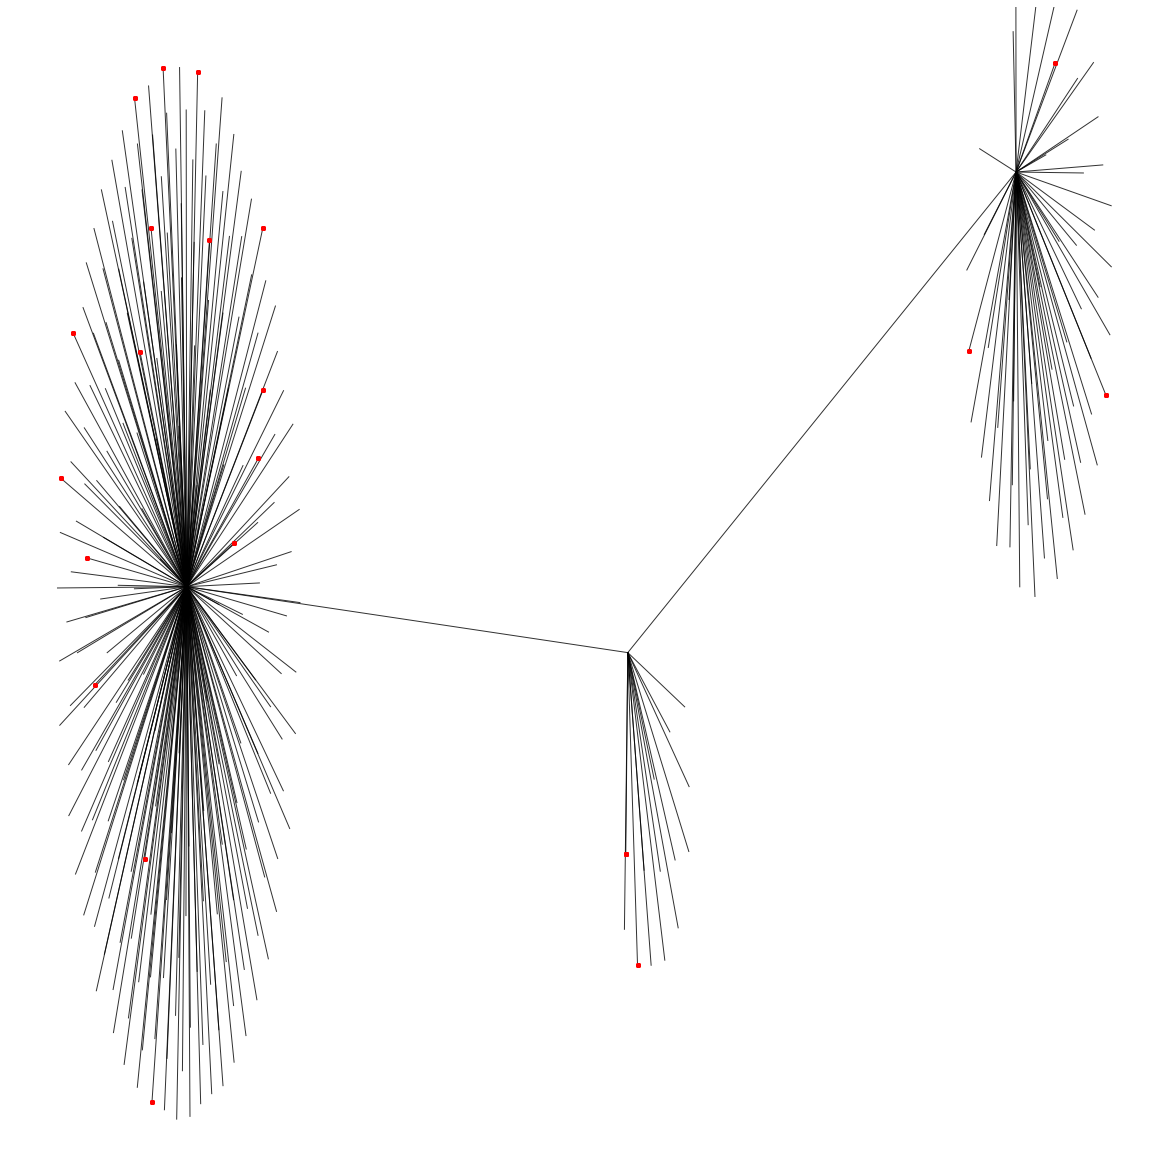

In [55]:
import json
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rc('figure', figsize=[16,16])

date = datetime.strptime('2020-01-14', '%Y-%m-%d')

G = nx.Graph()
# G=nx.cubical_graph()
# pos=nx.spring_layout(G)

job_titles = []
locations = []
department_names = []


with open('../../data/raw/data.json') as json_file:
    data = json.load(json_file)
    G.add_node("Top position")
    for person1 in data['directReports']:        
        if date > datetime.strptime(person1['hireDate'], '%Y-%m-%d'):
            job_titles.append(person1['jobTitle'])
            locations.append(location_mapping[person1['location']])
            department_names.append(str(person1['departmentName']))
            G.add_node(person1['name'])
            department_nodes[str(person1['departmentName'])].append(person1['name'])
            location_nodes[location_mapping[person1['location']]].append(person1['name'])
            G.add_edge(person1['name'], "Top position")
            department_edges[str(person1['departmentName'])].append((person1['name'], "Top position"))
            location_edges[location_mapping[person1['location']]].append((person1['name'], "Top position"))
        else:
            person1_name = "Top position"
        for person2 in person1['directReports']:
            if date > datetime.strptime(person2['hireDate'], '%Y-%m-%d'):
                job_titles.append(person2['jobTitle']) 
                locations.append(location_mapping[person2['location']])
                department_names.append(str(person2['departmentName']))
                G.add_node(person2['name'])
                department_nodes[str(person2['departmentName'])].append(person2['name'])
                location_nodes[location_mapping[person2['location']]].append(person2['name'])
                G.add_edge(person2['name'], person1_name)
                department_edges[str(person2['departmentName'])].append((person2['name'], person1_name))
                location_edges[location_mapping[person2['location']]].append((person2['name'], person1_name))
            else:
                person2_name = person1['name'] if date > datetime.strptime(person1['hireDate'], '%Y-%m-%d') else "Top position"
            for person3 in person2['directReports']:
                if date > datetime.strptime(person3['hireDate'], '%Y-%m-%d'):
                    job_titles.append(person3['jobTitle'])   
                    locations.append(location_mapping[person3['location']])
                    department_names.append(str(person3['departmentName']))
                    G.add_node(person3['name'])
                    department_nodes[str(person3['departmentName'])].append(person3['name'])
                    location_nodes[location_mapping[person3['location']]].append(person3['name'])
                    G.add_edge(person3['name'], person2_name)
                    department_edges[str(person3['departmentName'])].append((person3['name'], person2_name))
                    location_edges[location_mapping[person3['location']]].append((person3['name'], person2_name))
                else:
                    person3_name = person2['name'] if date > datetime.strptime(person2['hireDate'], '%Y-%m-%d') else person1['name'] if date > datetime.strptime(person1['hireDate'], '%Y-%m-%d') else "Top position"
                for person4 in person3['directReports']:
                    if date > datetime.strptime(person4['hireDate'], '%Y-%m-%d'):
                        job_titles.append(person4['jobTitle'])         
                        locations.append(location_mapping[person4['location']])
                        department_names.append(str(person4['departmentName']))
                        G.add_node(person4['name'])
                        department_nodes[str(person4['departmentName'])].append(person4['name'])
                        location_nodes[location_mapping[person4['location']]].append(person4['name'])
                        G.add_edge(person4['name'], person3_name)
                        department_edges[str(person4['departmentName'])].append((person4['name'], person3_name))
                        location_edges[location_mapping[person4['location']]].append((person4['name'], person3_name))
                    else:
                        person4_name = person3['name'] if date > datetime.strptime(person3['hireDate'], '%Y-%m-%d') else person2['name'] if date > datetime.strptime(person2['hireDate'], '%Y-%m-%d') else person1['name'] if date > datetime.strptime(person1['hireDate'], '%Y-%m-%d') else "Top position"
                    for person5 in person4['directReports']:
                        if date > datetime.strptime(person5['hireDate'], '%Y-%m-%d'):
                            job_titles.append(person5['jobTitle'])      
                            locations.append(location_mapping[person5['location']])
                            department_names.append(str(person5['departmentName']))
                            G.add_node(person5['name'])
                            department_nodes[str(person5['departmentName'])].append((person1['name']))
                            location_nodes[location_mapping[person5['location']]].append(person5['name'])
                            G.add_edge(person5['name'], person4_name)
                            department_edges[str(person5['departmentName'])].append((person5['name'], person4_name))
                            location_edges[location_mapping[person5['location']]].append((person5['name'], person4_name))
                        else:
                            pass
        
        

        
nx.draw(G,
                       nodelist=department_nodes['Product Management'],
                       node_color='r',
                       node_size=16,
                       with_labels=False,
                   alpha=0.8)
# nx.draw(G,
#                        nodelist=department_nodes['Sales'],
#                        node_color='o',
#                        node_size=500,
#                        with_labels=False,
#                    alpha=0.8)
# nx.draw(G,
#                        nodelist=department_nodes['None'],
#                        node_color='y',
#                        node_size=500,
#                        with_labels=False,
#                    alpha=0.8)
# nx.draw(G,
#                        nodelist=department_nodes['G&A'],
#                        node_color='g',
#                        node_size=500,
#                        with_labels=False,
#                    alpha=0.8)
# nx.draw(G,
#                        nodelist=department_nodes['Finance'],
#                        node_color='b',
#                        node_size=500,
#                        with_labels=False,
#                    alpha=0.8)
# nx.draw(G,
#                        nodelist=department_nodes['Support and Operations'],
#                        node_color='p',
#                        node_size=500,
#                        with_labels=False,
#                    alpha=0.8)
# nx.draw(G,
#                        nodelist=department_nodes['Marketing'],
#                        node_color='v',
#                        node_size=500,
#                        with_labels=False,
#                    alpha=0.8)
# nx.draw(G,
#                        nodelist=department_nodes['Technology'],
#                        node_color='i',
#                        node_size=500,
#                        with_labels=False,
#                    alpha=0.8)
# nx.draw(G,
#                        nodelist=department_nodes['People'],
#                        node_color='lb',
#                        node_size=500,
#                        with_labels=False,
#                    alpha=0.8)



# nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
# nx.draw_networkx_edges(G,pos,
#                        edgelist=[(0,1),(1,2),(2,3),(3,0)],
#                        width=8,alpha=0.5,edge_color='r')
# nx.draw_networkx_edges(G,pos,
#                        edgelist=[(4,5),(5,6),(6,7),(7,4)],
#                        width=8,alpha=0.5,edge_color='b')


# nx.draw(G, with_labels=False, font_weight='bold')        

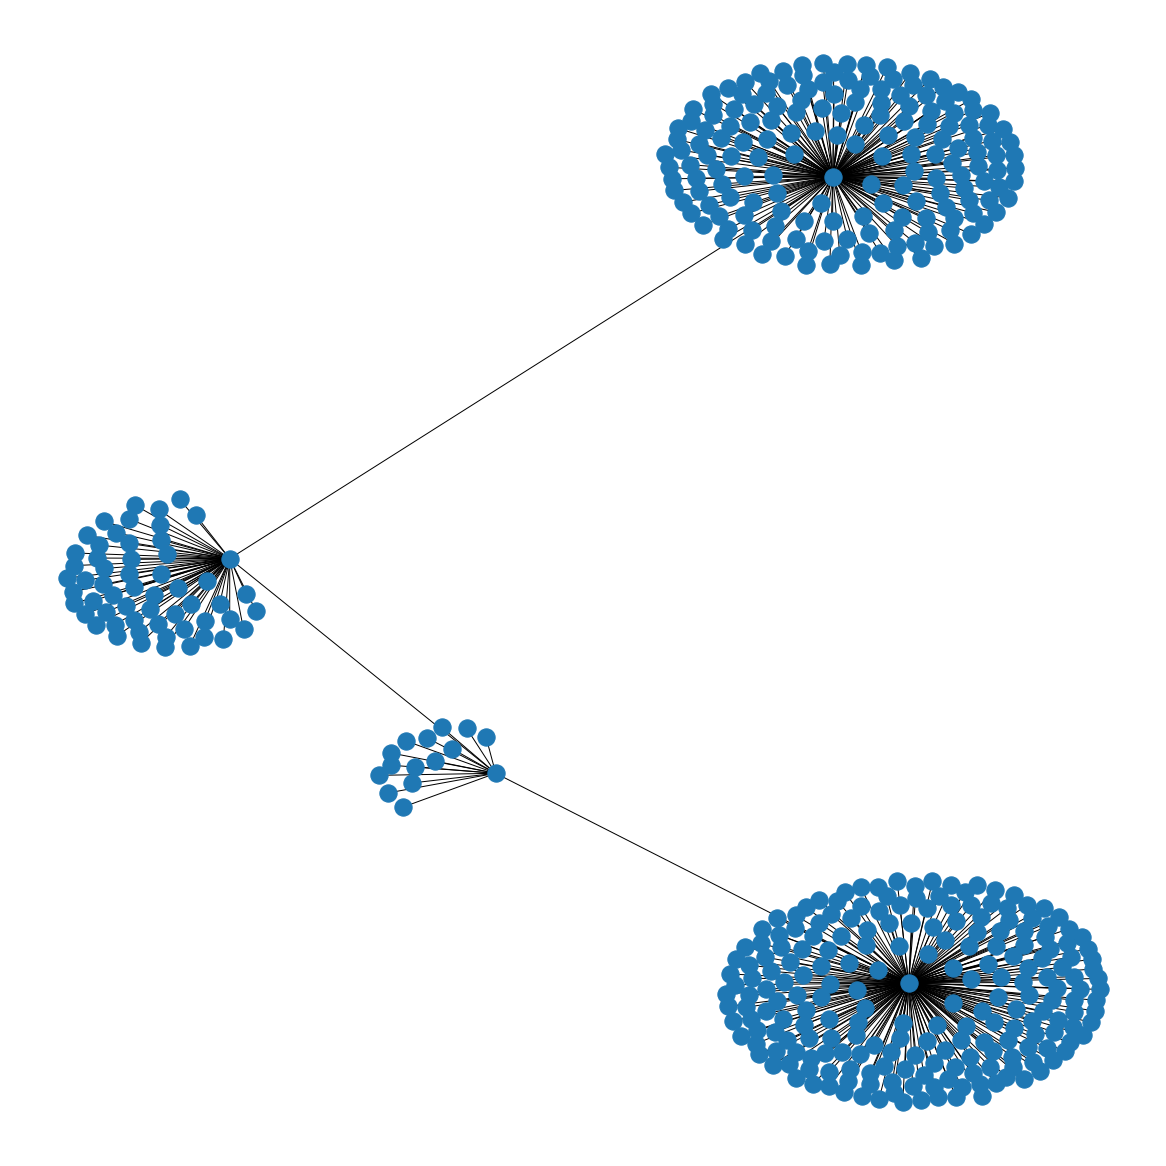

In [56]:
nx.draw(G, with_labels=False, font_weight='bold')

In [11]:
job_titles

['Chief Executive Officer',
 'Chief Marketing Officer (Shared)',
 'Manager, Design',
 'Graphic Designer',
 'Marketing Events Manager (Shared)',
 'Director, Demand Generation (Shared)',
 'Senior Director, Product Marketing (Shared)',
 'Product Marketing Manager (Shared)',
 'Product Marketing Manager, Associate (Shared)',
 'Product Marketing Manager (Shared)',
 'Chief Product Officer',
 'Manager, Product Mgmt (Group Product Manager)(Shared)',
 'Growth Product Manager, Associate (PC)',
 'Director, Technical Product Management',
 'Product Manager, Associate',
 'VP, Product',
 'Product Manager, Associate',
 'Product Manager, Senior, Finance (Shared)',
 'Director, User Experience (Shared)',
 'Manager, Design and User Experience (Shared)',
 'Director, Product Strategy (IPS)',
 'Product Enablement Specialist',
 'Team Lead, Data Science',
 'Team Lead, Data Science',
 'Data Scientist - Core',
 'Data Scientist - Associate L2',
 'Co-founder/Strategic Operations',
 'VP, Strategic Initiatives',
 'Ge

In [14]:
print(len(job_titles))

456


In [15]:
print(len(set(job_titles)))

271


In [16]:
data['directReports'][0]

{'id': '644',
 'name': 'David Yovanno',
 'photo': 'https://920eabaf46d910483404-19ee3f1415dd08db8fd3e2767a3601bc.ssl.cf1.rackcdn.com/photos/644-1-4.jpg',
 'divisionName': 'G&A',
 'departmentName': 'G&A',
 'location': 'US-CA-Santa Barbara',
 'hireDate': '2017-02-01',
 'jobTitle': 'Chief Executive Officer',
 'reportsTo': None,
 'phone': None,
 'email': 'dave@impact.com',
 'directReportsCount': 13,
 'levels': 5,
 'canSeeEmployee': False,
 'root': False,
 'directReports': [{'id': '419',
   'name': 'Scott Brazina',
   'photo': 'https://920eabaf46d910483404-19ee3f1415dd08db8fd3e2767a3601bc.ssl.cf1.rackcdn.com/photos/419-1-4.jpg',
   'divisionName': 'Marketing',
   'departmentName': 'Marketing',
   'location': 'US-NY-New York',
   'hireDate': '2017-11-09',
   'jobTitle': 'Chief Marketing Officer (Shared)',
   'reportsTo': '644',
   'phone': None,
   'email': 'scott@impact.com',
   'directReportsCount': 7,
   'levels': 3,
   'canSeeEmployee': False,
   'root': False,
   'directReports': [{'id'

In [19]:
print(list(set(locations)))

['US-OH-Columbus', 'US-NY-New York', 'US-CA-Remote (San Francisco)', 'AU-Sydney', 'ZA-Cape Town', 'US-TN-Remote (Santa Barbara)', 'US-NY (Remote) UK', 'US-WA-Seattle', 'EU-Poland', 'US-CA-San Francisco', 'US-NC-Remote (New York)', 'US-CA-Remote (Santa Barbara)', 'SG-Singapore', 'US-TX-Remote (Seattle)', '0. Advisor - US', 'US-OH-Remote (Columbus)', 'US-AZ-Remote (New York)', 'US-AR-Remote (Columbus)', 'NO-Oslo', 'US-CO-Remote (New York)', 'US-CA-Remote (Seattle)', 'CN-Shanghai', 'US-AZ-Remote (Seattle)', 'US-CT-Remote (New York)', '0.Contractor', 'GB-London', 'US-CA-Santa Barbara', 'Nepal (US-WA-Seattle', 'US-HI-Remote (Santa Barbara)']


In [26]:
list(set(department_names))

['Product Management',
 'Sales',
 None,
 'G&A',
 'Finance',
 'Support and Operations',
 'Marketing',
 'Technology',
 'People']

In [28]:
list(set(locations))

['Singapore',
 'Columbus',
 'Seattle',
 'Shanghai',
 'New York',
 'London',
 'Santa Barbara',
 'Cape Town',
 'Remote',
 'Sydney']